<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

# Fiche CC2 : Application du principe de stationnarité sur bases de données locales

In [61]:
import numpy as np
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy.linalg import det
from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
## Importation des données

In [2]:
path = "C:\\Users\\issak\\Documents\\M1\\Econométrie en Banque-Finance\\data_2\\"
df = pd.read_csv(path + "capm2.txt",sep=";")
df.head()

,date,ford,sandp,ustb3m,oil
0,2001-01-01,15.454666,1366.010010,4.84,28.700001
1,2001-02-01,15.411097,1239.939941,4.72,27.420000
2,2001-03-01,15.582887,1160.329956,4.18,26.400000
3,2001-04-01,16.336536,1249.459961,3.83,26.400000
4,2001-05-01,13.631827,1255.819946,3.54,28.370001


In [3]:
df["rsandp"] = 100 * ( df["sandp"]/df["sandp"].shift(1) - 1 )
df["rford"] = 100 * ( df["ford"]/df["ford"].shift(1) - 1 )

In [4]:
df.head()

,date,ford,sandp,ustb3m,oil,rsandp,rford
0,2001-01-01,15.454666,1366.010010,4.84,28.700001,NaN,NaN
1,2001-02-01,15.411097,1239.939941,4.72,27.420000,-9.229074,-0.281915
2,2001-03-01,15.582887,1160.329956,4.18,26.400000,-6.420471,1.114716
3,2001-04-01,16.336536,1249.459961,3.83,26.400000,7.681436,4.836389
4,2001-05-01,13.631827,1255.819946,3.54,28.370001,0.509019,-16.556196


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Graphiques

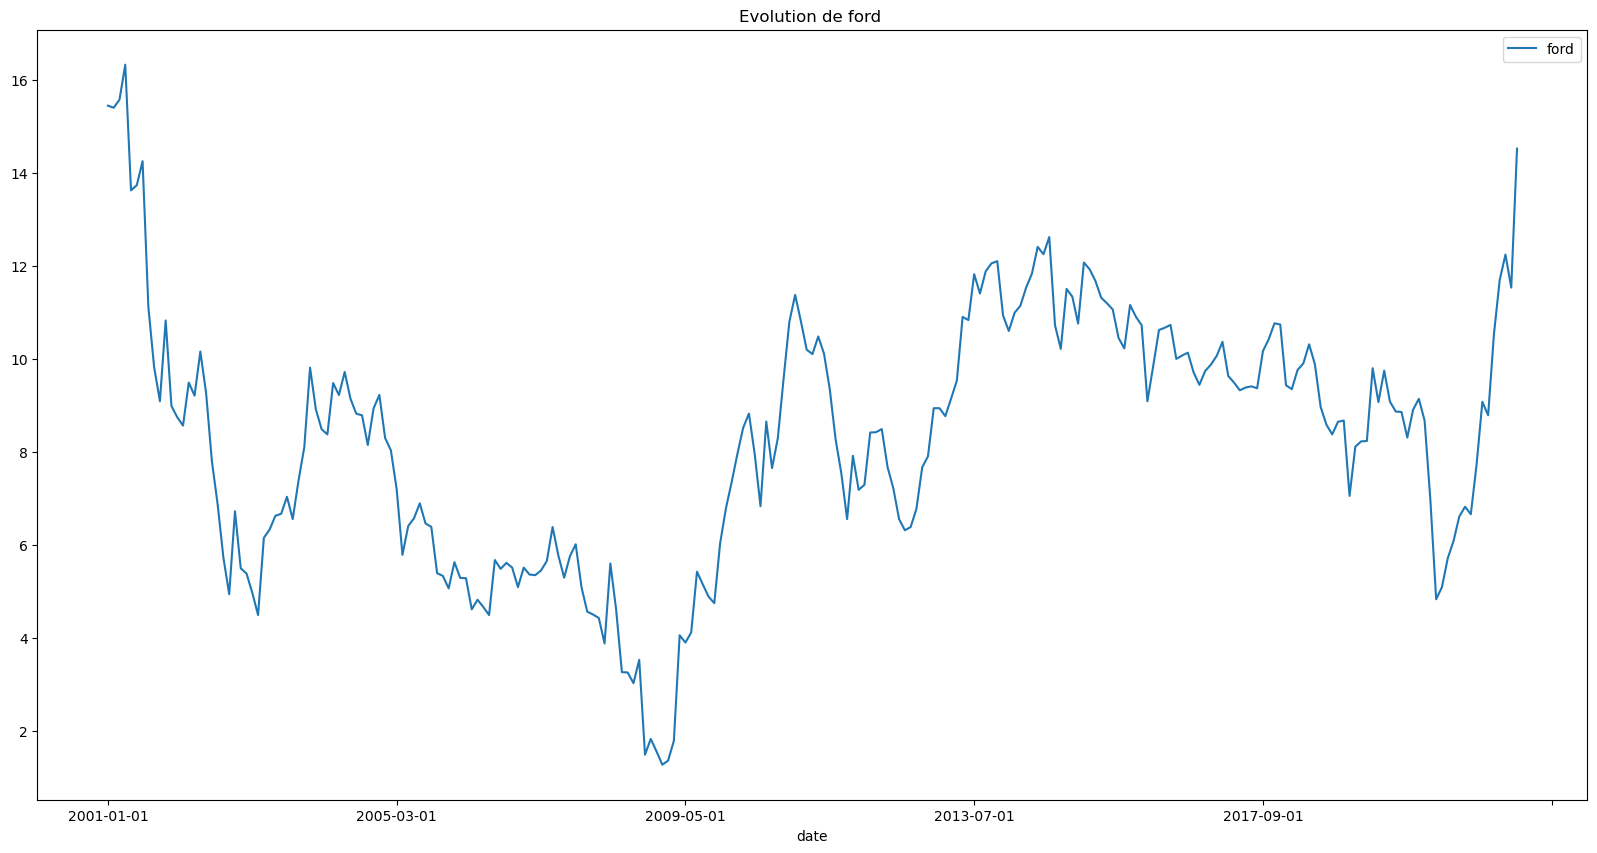

In [5]:
# graphique ford 1
plt.rcParams['figure.figsize'] = (20,10)

df.plot(x = "date", y="ford", title="Evolution de ford ")
plt.show()

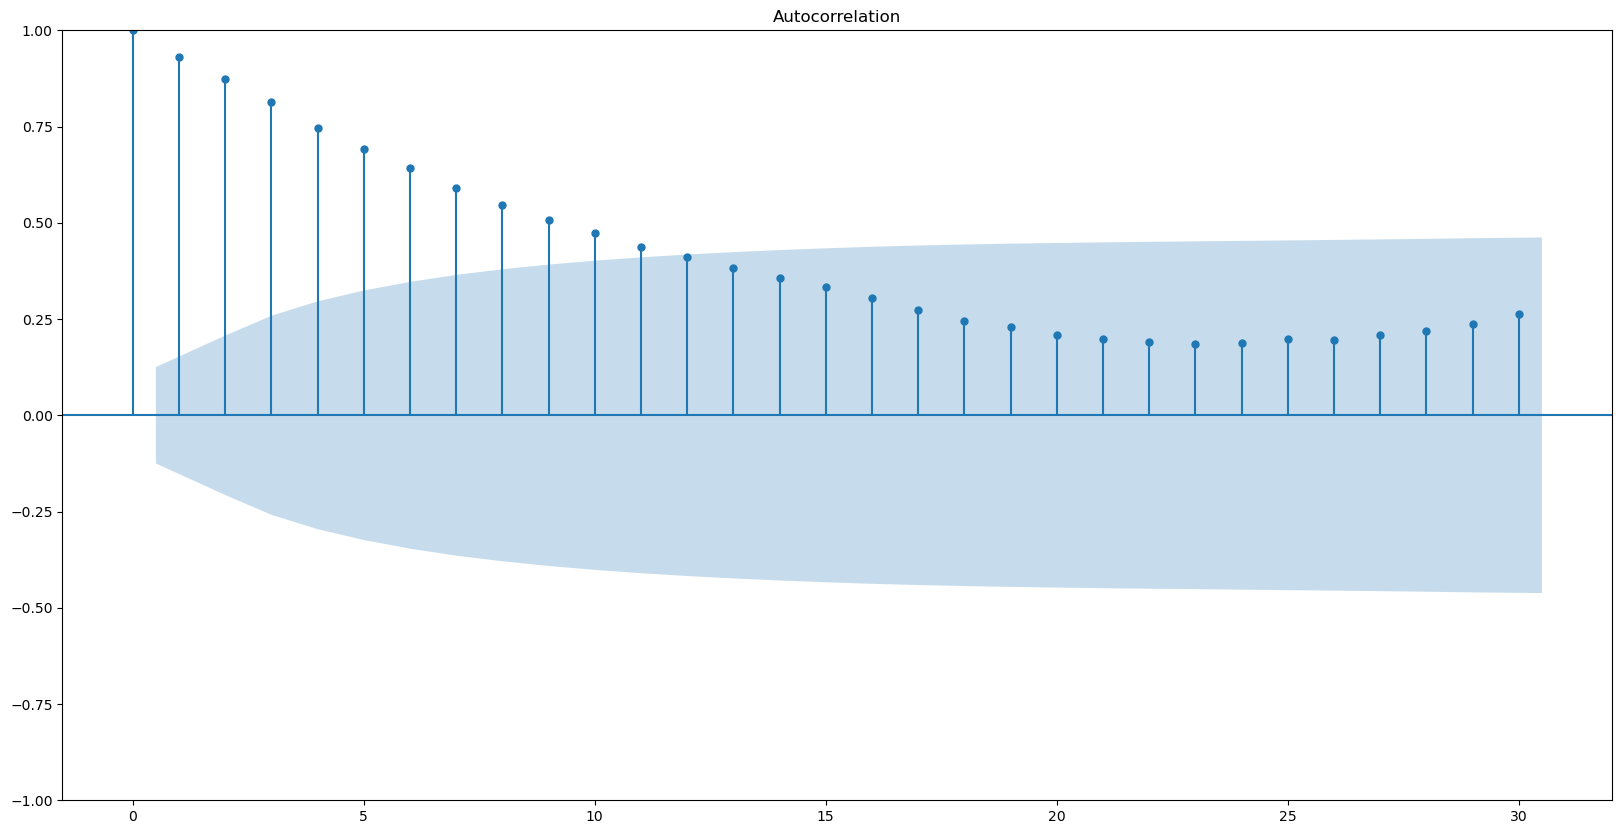

In [6]:
# graphique ford 2
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(df["ford"], lags=30)
plt.show()

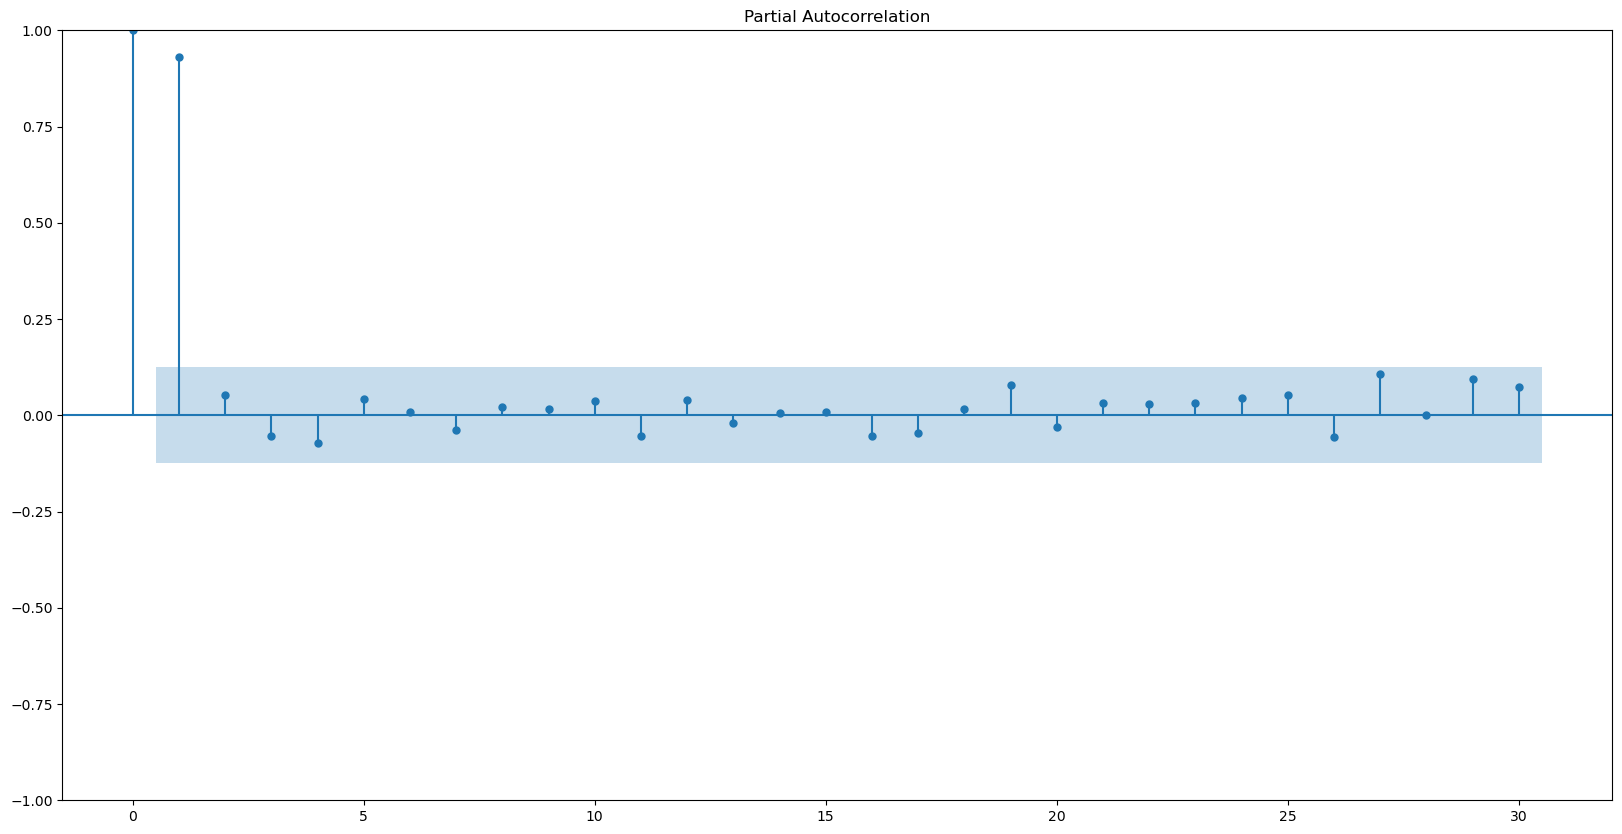

In [7]:
# graphique ford 3
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(df["ford"], lags=30)
plt.show()

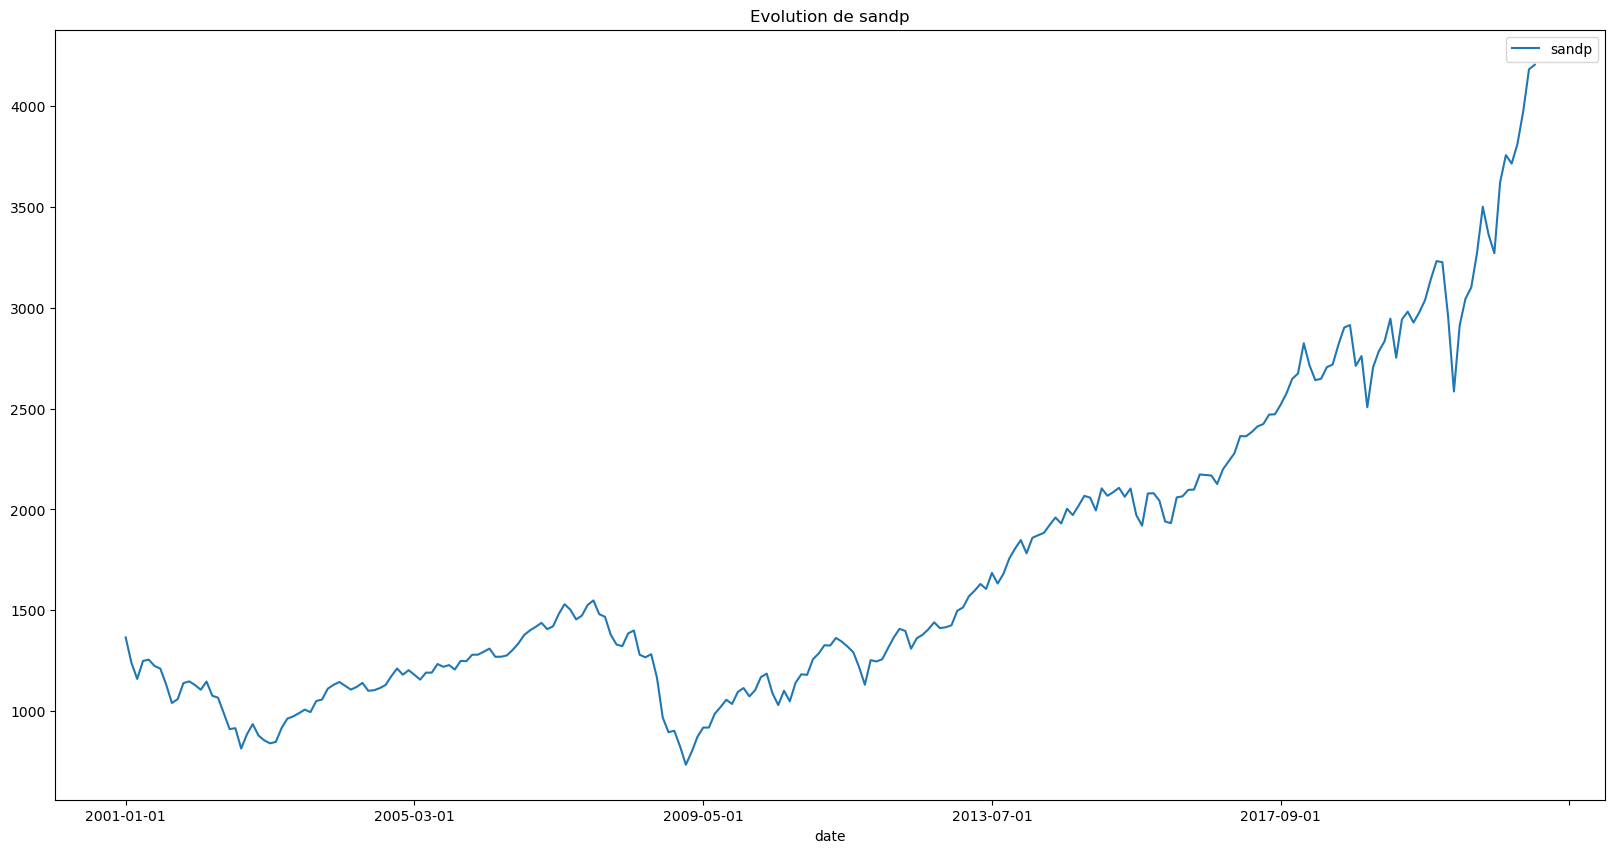

In [8]:
# graphique sandP 1
plt.rcParams['figure.figsize'] = (20,10)

df.plot(x = "date", y="sandp", title="Evolution de sandp")
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Graphique d'évolution du NIVEAU de prix de l'actif ford. On constate que la série ne semble pas stationnaire : plusieurs tendances locales, la variance et la moyenne ne semblent pas constante dans le temps, une structure visibelement autocorrélée, on peut pensé à  une marche aléatoire.

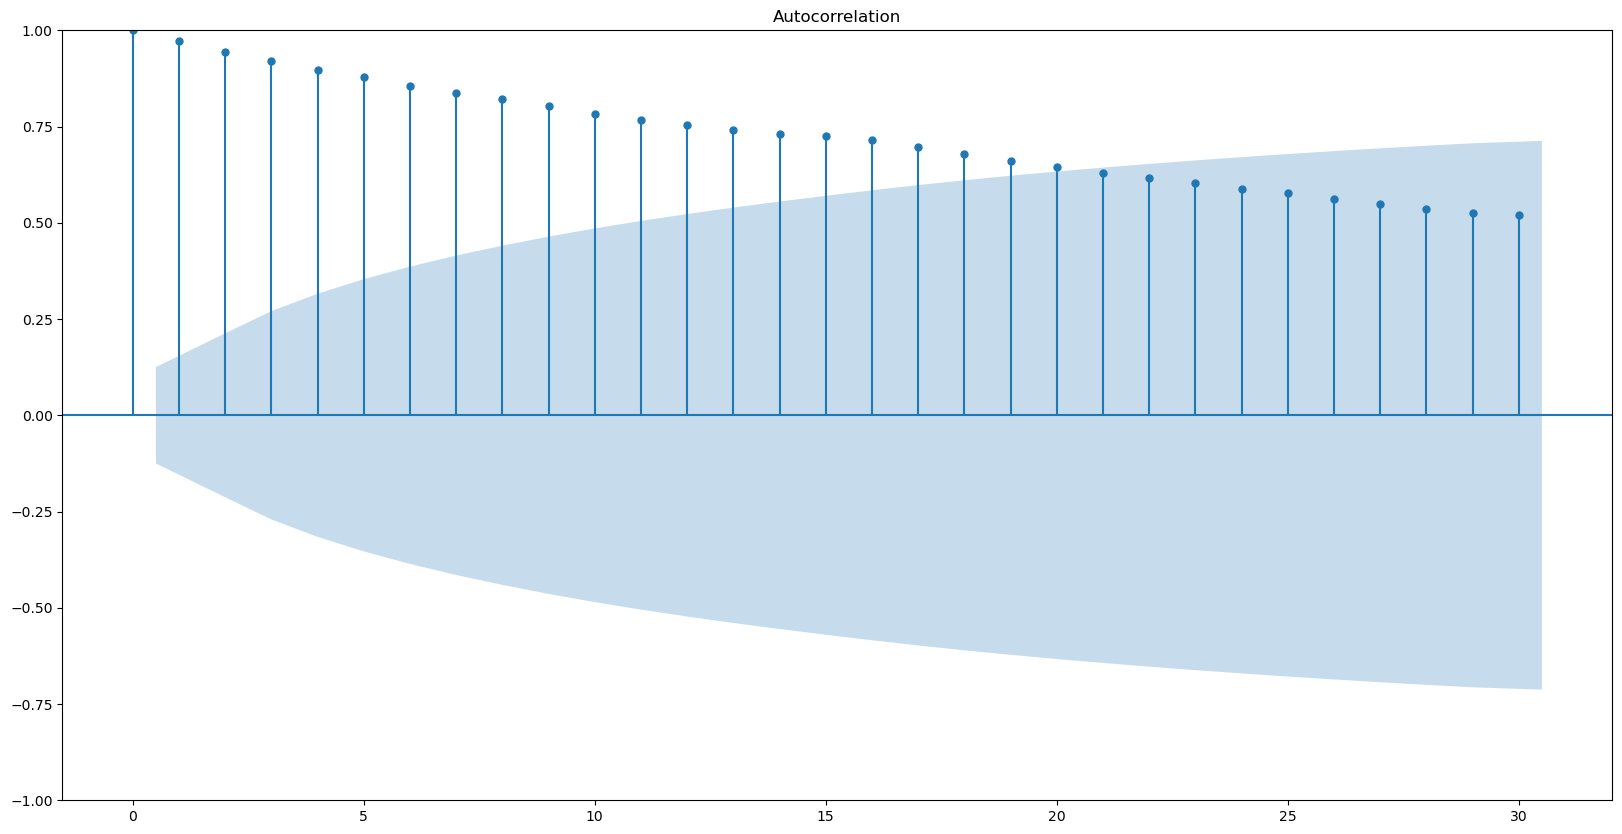

In [9]:
# graphique sandp 2
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(df["sandp"], lags=30)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Autocorrélogramme : permet de voir la structure autorégressive (de long terme) des séries   
    
On soupçonne de la grosse autocorrélation. Ici on peut voir (à peu près) un processus autoregressif d'ordre 20 ce qui signifie que ce qui se passe aujourd'hui est influencer par les 20 périodes antérieur, ici on travaille sur une action donc 20 jours

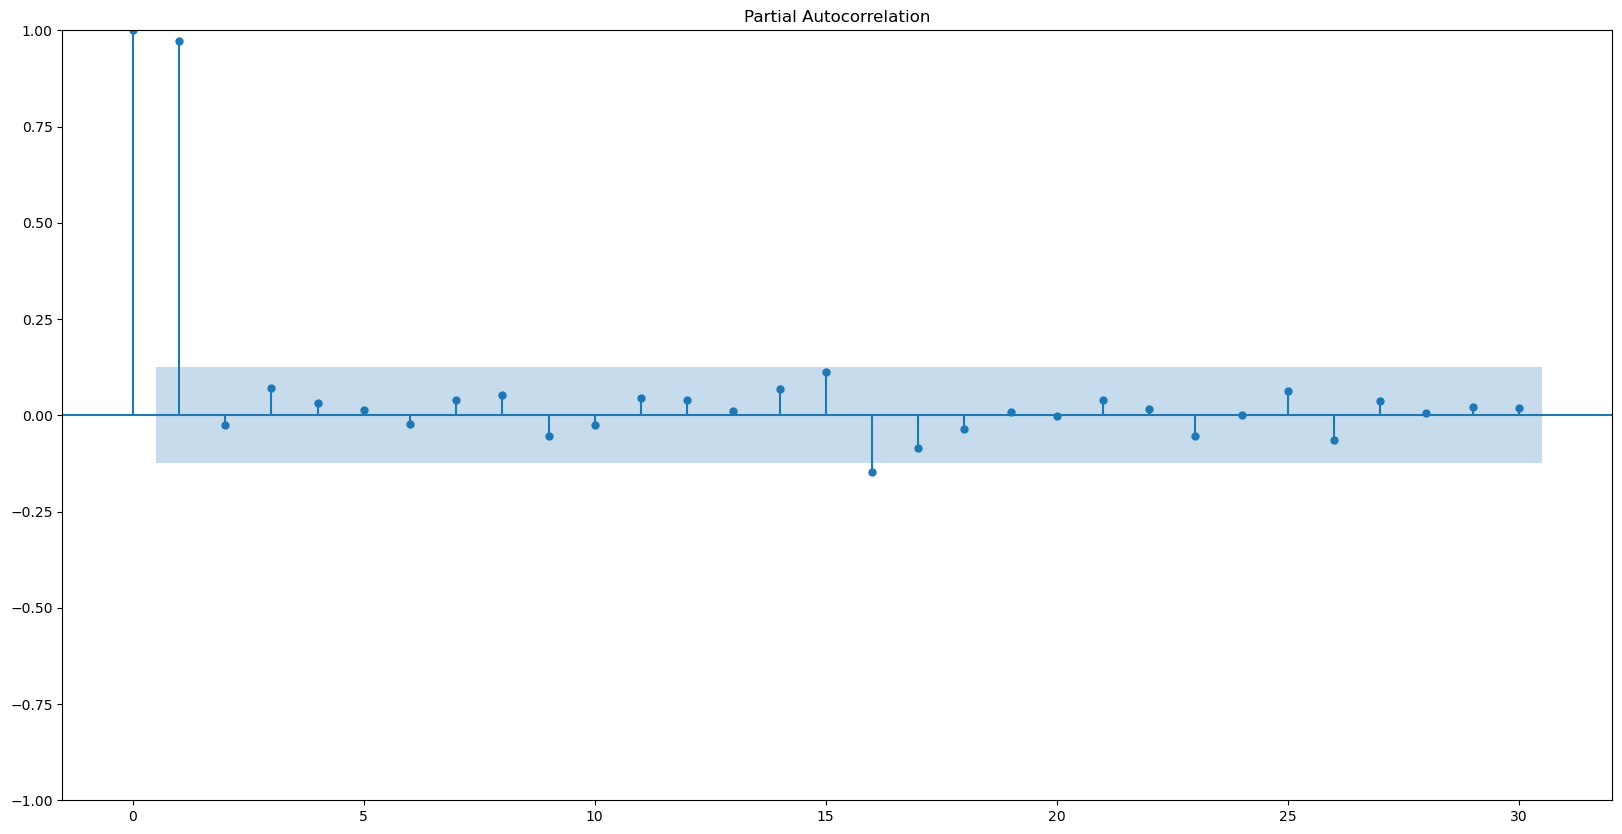

In [10]:
# graphique sandp 3
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(df["sandp"], lags=30)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
Autocorrélations partielles : permet de voir l'autocorrélation entre deux périodes après avoir purgé l'effet des autres périodes
    
Il mesure le degré d'autocorrélation. On ne prend jamais en compte le premier point qui représente le processus autoregressif d'ordre 0. Cela confirme l'idée de marche aléatoire puisque lorsque l'on retire l'effet des autres périodes, la seule autocorrélation partielle significative est celle à l'o

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: .5px solid black;">

- Ces graphiques sont :
    - graphiques lignes pour voir l'allure des séries et, éventuellement en déduire de l'information sur la stationnarité des séries
    - autocorrélogramme : permet de voir la structure autorégressive (de long terme) des séries
    - autocorrélations partielles : permet de voir l'autocorrélation entre deux périodes après avoir purgé l'effet des autres périodes
    
<br>
    
- graphique ford 1 : graphique d'évolution du NIVEAU de prix de l'actif ford. On constate que la série ne semble pas stationnaire : plusieurs tendances locales, une structure visibelement autocorrélée (type marche aléatoire ?)
- graphique ford 2 : autocorrélogramme. Montre que la série est fortement autocorrélée : une variation en $t$ a un effet 10 périodes plus tard (voir le dernier coefficient d'autocorrélation significativement différent de $0$, ie en dehors de l'intervalle de confiance)
- graphique ford 3 : autocorrélations partielles. Confirme l'idée de marche aléatoire puisque l'orsque l'on retire l'effet des autres périodes, la seule autocorrélation partielle significative est celle à l'ordre 1. 

- Meme analyse et mêmes commentaires pour les graphiques du sandp.

<br>

- Conclusion : les séries ne semblent pas stationnaires.


</span> 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Analyse de la stationnarité à travers la procédure du Test ADF
    
   - $H_0$ : la série est non-stationnaire, c a d qu'elle contient au moins une racine unitaire
   - $H_1$ : la série est stationnaire, c a d qu'elle ne comporte pas de racine unitaire

Ainsi, contrairement aux règles de décisions habituelles pour les tests bilatéraux, la règle est inversée :

   - $stat_{test} < stat_{table}$ on ne rejette pas $H_0$ : la tendance/constante n'est pas significativement différente de 0 (non-stationnaire)
    
   - $stat_{test} > stat_{table}$ on rejette $H_0$: la tendance/constante est pas significativement différente de 0 (stationnaire)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>



- Valeurs critiques de la constante et de la tendance dans le test de Dickey-Fuller

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="6" style="text-align: center;border-right: 2px solid black"><i>Modèle [3]</i></td>
    </tr>
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Trend</td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">3.22</td>
        <td style="text-align: center;border-right: 2px dotted black">2.54</td>
        <td style="text-align: center;border-right: 2px solid black">2.17</td>
        <td style="text-align: center;border-right: 2px dotted black">3.78</td>
        <td style="text-align: center;border-right: 2px dotted black">3.11</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.53</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">3.19</td>
        <td style="text-align: center;border-right: 2px dotted black">2.53</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.74</td>
        <td style="text-align: center;border-right: 2px dotted black">3.09</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.49</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.48</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.71</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
</table>
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Analyse de Ford

In [11]:
adf1 = adfuller(df['ford'], regression='ct', autolag='AIC', regresults=True)

In [12]:
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.625
Date:                Thu, 28 Nov 2024   Prob (F-statistic):            0.00158
Time:                        01:43:34   Log-Likelihood:                -291.21
No. Observations:                 244   AIC:                             588.4
Df Residuals:                     241   BIC:                             598.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0609      0.019     -3.128      0.002      -0.099      -0.023
const          0.2629      0.173      1.523      0.129      -0.077       0.603
x2             0.0019      0.001      2.563      0.011       0.000       0.003
==============================================================================
Omnibus:                        7.419   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               12.264
Skew:                           0.079   Prob(JB):                      0.00217
Kurtosis:                       4.087   Cond. No.                         477.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = 2.563 < stat_{table}=2.79$ on ne rejette pas $H_0$ : la tendance n'est pas significativement différente de 0 (non-stationnaire)

In [13]:
adf1 = adfuller(df['ford'], regression='c', autolag='AIC', regresults=True)
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.532
Date:                Thu, 28 Nov 2024   Prob (F-statistic):             0.0112
Time:                        01:43:34   Log-Likelihood:                -294.49
No. Observations:                 244   AIC:                             593.0
Df Residuals:                     242   BIC:                             600.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0489      0.019     -2.556      0.011      -0.087      -0.011
const          0.3994      0.166      2.405      0.017       0.072       0.727
==============================================================================
Omnibus:                        8.604   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               16.106
Skew:                           0.009   Prob(JB):                     0.000318
Kurtosis:                       4.259   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = 2.405 < stat_{table}=2.53$ on ne rejette pas $H_0$ : la constante n'est pas significativement différente de 0 (non-stationnaire)

In [14]:
adf1 = adfuller(df['ford'], regression='n', autolag='AIC', regresults=True)
adf1

(-0.8609055822923205,
 0.3450536516312156,
 {'1%': -2.574964035877452,
  '5%': -1.9421551907566053,
  '10%': -1.6157753152576646},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1455e2d88d0>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test_1chiffre} = -0.860 > stat_{table}=-1.942$ on ne rejette pas $H_0$ la série est non stationnaire de type stochastique

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Transformation de la variable ford et vérification de stationnarité

In [15]:
df = df.dropna()

In [16]:
adf2 = adfuller(df['rford'], regression='ct', autolag='AIC', regresults=True)
adf2[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     33.89
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           6.92e-35
Time:                        01:43:35   Log-Likelihood:                -953.10
No. Observations:                 237   AIC:                             1924.
Df Residuals:                     228   BIC:                             1955.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8630      0.168     -5.144      0.000      -1.194      -0.532
x2            -0.0802      0.152     -0.529      0.597      -0.379       0.218
x3            -0.0812      0.140     -0.579      0.563      -0.358       0.195
x4            -0.0405      0.126     -0.322      0.748      -0.288       0.207
x5            -0.0645      0.111     -0.583      0.560      -0.282       0.153
x6            -0.0029      0.091     -0.032      0.975      -0.181       0.176
x7            -0.2073      0.065     -3.171      0.002      -0.336      -0.078
const          0.1048      1.794      0.058      0.953      -3.430       3.639
x8             0.0067      0.013      0.513      0.609      -0.019       0.033
==============================================================================
Omnibus:                      165.846   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3287.522
Skew:                           2.397   Prob(JB):                         0.00
Kurtosis:                      20.605   Cond. No.                         275.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = 0.513 < stat_{table}=2.79$ on ne rejette pas $H_0$ : la tendance n'est pas significativement différente de 0 (non-stationnaire)

In [17]:
adf2 = adfuller(df['rford'], regression='c', autolag='AIC', regresults=True)

In [18]:
adf2[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     38.82
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.21e-35
Time:                        01:43:35   Log-Likelihood:                -953.24
No. Observations:                 237   AIC:                             1922.
Df Residuals:                     229   BIC:                             1950.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8563      0.167     -5.128      0.000      -1.185      -0.527
x2            -0.0858      0.151     -0.568      0.570      -0.383       0.212
x3            -0.0857      0.140     -0.613      0.540      -0.361       0.190
x4            -0.0440      0.125     -0.351      0.726      -0.291       0.203
x5            -0.0669      0.110     -0.606      0.545      -0.284       0.150
x6            -0.0044      0.090     -0.049      0.961      -0.183       0.174
x7            -0.2081      0.065     -3.188      0.002      -0.337      -0.079
const          0.8999      0.900      0.999      0.319      -0.874       2.674
==============================================================================
Omnibus:                      163.916   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3215.172
Skew:                           2.360   Prob(JB):                         0.00
Kurtosis:                      20.416   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = 0.849 < stat_{table}=2.53$ on ne rejette pas $H_0$ : la constante n'est pas significativement différente de 0 (non-stationnaire)

In [19]:
adf2 = adfuller(df['rford'], regression='n', autolag='AIC', regresults=True)
adf2

(-5.040185411074018,
 8.815893119249971e-07,
 {'1%': -2.57523832825936,
  '5%': -1.9421908963553556,
  '10%': -1.615745738021025},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1455e314cd0>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test_1chiffre} = -5.040 < stat_{table}=-1.942$ on rejette $H_0$ la série est stationnaire, elle est intégrée d'ordre 1

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Analyse de SandP

In [20]:
adf3 = adfuller(df['sandp'], regression='ct', autolag='AIC', regresults=True)
adf3[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.770
Date:                Thu, 28 Nov 2024   Prob (F-statistic):            0.00429
Time:                        01:43:35   Log-Likelihood:                -1354.2
No. Observations:                 236   AIC:                             2728.
Df Residuals:                     226   BIC:                             2763.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0085      0.016      0.540      0.590      -0.023       0.040
x2             0.0140      0.068      0.208      0.836      -0.119       0.147
x3            -0.1658      0.068     -2.455      0.015      -0.299      -0.033
x4             0.0073      0.068      0.107      0.915      -0.128       0.142
x5            -0.0270      0.068     -0.396      0.692      -0.161       0.107
x6             0.0054      0.068      0.080      0.937      -0.129       0.140
x7            -0.0753      0.067     -1.123      0.263      -0.208       0.057
x8             0.2082      0.069      2.999      0.003       0.071       0.345
const        -15.2968     14.231     -1.075      0.284     -43.339      12.746
x9             0.1260      0.159      0.790      0.430      -0.188       0.440
==============================================================================
Omnibus:                       68.654   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.434
Skew:                          -1.040   Prob(JB):                     9.77e-76
Kurtosis:                       8.550   Cond. No.                     5.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = 0.790 < stat_{table}=2.79$ on ne rejette pas $H_0$ : la tendance n'est pas significativement différente de 0 (non-stationnaire)

In [21]:
adf3 = adfuller(df['sandp'], regression='c', autolag='AIC', regresults=True)
adf3[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.043
Date:                Thu, 28 Nov 2024   Prob (F-statistic):            0.00286
Time:                        01:43:35   Log-Likelihood:                -1354.5
No. Observations:                 236   AIC:                             2727.
Df Residuals:                     227   BIC:                             2758.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0192      0.008      2.383      0.018       0.003       0.035
x2             0.0067      0.067      0.101      0.920      -0.125       0.139
x3            -0.1714      0.067     -2.555      0.011      -0.304      -0.039
x4             0.0031      0.068      0.046      0.964      -0.131       0.137
x5            -0.0303      0.068     -0.445      0.656      -0.164       0.104
x6             0.0022      0.068      0.033      0.974      -0.132       0.136
x7            -0.0783      0.067     -1.169      0.243      -0.210       0.054
x8             0.2082      0.069      3.002      0.003       0.072       0.345
const        -18.4981     13.631     -1.357      0.176     -45.357       8.361
==============================================================================
Omnibus:                       69.131   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.473
Skew:                          -1.049   Prob(JB):                     3.53e-76
Kurtosis:                       8.562   Cond. No.                     5.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = -1.357 < stat_{table}=2.53$ on ne rejette pas $H_0$ : la constante n'est pas significativement différente de 0 (non-stationnaire)

In [22]:
adf3 = adfuller(df['sandp'], regression='n', autolag='AIC', regresults=True)
adf3

(2.8750049612062956,
 0.9996332335111157,
 {'1%': -2.5752788501867276,
  '5%': -1.9421961774481569,
  '10%': -1.6157413754205638},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1455e3007d0>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test_1chiffre} = 2.875 > stat_{table}=-1.942$ on ne rejette pas $H_0$ la série est non stationnaire de type stochastique

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Transformation de la variable SandP et vérification de stationnarité

In [23]:
adf4 = adfuller(df['rsandp'], regression='ct', autolag='AIC', regresults=True)
adf4[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.52e-33
Time:                        01:43:35   Log-Likelihood:                -695.80
No. Observations:                 243   AIC:                             1398.
Df Residuals:                     240   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9212      0.064    -14.441      0.000      -1.047      -0.796
const         -0.2884      0.550     -0.524      0.600      -1.372       0.795
x2             0.0069      0.004      1.751      0.081      -0.001       0.015
==============================================================================
Omnibus:                       16.097   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.746
Skew:                          -0.436   Prob(JB):                     6.98e-06
Kurtosis:                       4.259   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = 1.751 < stat_{table}=2.79$ on ne rejette pas $H_0$ : la tendance n'est pas significativement différente de 0 (non-stationnaire)

In [24]:
adf4 = adfuller(df['rsandp'], regression='c', autolag='AIC', regresults=True)
adf4[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     203.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           6.42e-34
Time:                        01:43:35   Log-Likelihood:                -697.34
No. Observations:                 243   AIC:                             1399.
Df Residuals:                     241   BIC:                             1406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9057      0.063    -14.276      0.000      -1.031      -0.781
const          0.5444      0.277      1.965      0.051      -0.001       1.090
==============================================================================
Omnibus:                       14.844   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.176
Skew:                          -0.399   Prob(JB):                     1.53e-05
Kurtosis:                       4.247   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test} = 1.965 < stat_{table}=2.53$ on ne rejette pas $H_0$ : la constante n'est pas significativement différente de 0 (non-stationnaire)

In [25]:
adf3 = adfuller(df['rsandp'], regression='n', autolag='AIC', regresults=True)
adf3

(-14.057706745562323,
 2.2184681097475407e-25,
 {'1%': -2.5750022466087485,
  '5%': -1.94216016038016,
  '10%': -1.6157711900523155},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1455e3aa890>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
$stat_{test_1chiffre} = -14.057 < stat_{table}=-1.942$ on rejette $H_0$ la série est stationnaire, elle est intégrée d'ordre 1

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Analyse de la multicolinéarité
    
### VIF ($\textit{Variance Inflation Factor})$
    
#### VIF = 1 :

- Aucune multicolinéarité.
- La variance des coefficients estimés n’est pas gonflée.

#### 1 < VIF  $\le 5$ :

- Faible multicolinéarité.
- Généralement acceptable, bien que des corrélations légères soient présentes.
            
#### 5 < VIF $\le$ 10 :

- Multicolinéarité modérée.
- Les estimations des coefficients commencent à être affectées, nécessitant une analyse approfondie.

#### VIF > 10 :

- Forte multicolinéarité.
- Les coefficients deviennent instables et leur interprétation peut être compromise. 
- Des mesures correctives sont nécessaires.

In [26]:
l_explicatives =  ['rsandp','rford']

for n,var in enumerate(l_explicatives):
    print('le VIF de la variable', var, ' est : ',VIF(df[l_explicatives].dropna().values,n))

le VIF de la variable rsandp  est :  1.3768127538833834
le VIF de la variable rford  est :  1.3768127538833832


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
Avec des VIF inférieurs à 2 pour l'ensemble des variables, la présence de multicolinéarité apparaît faible. L'hypothèse des MCO, stipulant que la matrice des variables explicatives est de plein rang (condition nécessaire pour garantir l'estimation des paramètres), semble donc satisfaite.

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

### Test de multicolinéarité de Farrar et Glauber

#### Hypothèses du test
- $ H_0 $ : Absence de multicolinéarité.  
- $ H_A $ : Présence de multicolinéarité.  

#### Règle de décision
- Si $ Stat_{calculé} > Stat_{tabulé} $, alors $H_0$ est rejetée, présence de multicolinéarité.
- Si $ Stat_{calculé} \leq Stat_{tabulé} $, alors $H_0$ n'est pas rejetée, absence de multicolinéarité.


In [27]:
df.shape

(244, 7)

In [28]:
D = det(df[l_explicatives].corr())

    # calcul de la stat : T(pop obs)=250 et k ( nombre de var) = ici 2
    
    # Calcul de la statistique FG
    # FG = -(T - (1 / 6) * (k * (k + 1) + 5)) * np.log(D)
    
FG = -(250 - (1/6) * (2*(2+1))+5)*np.log(D)
print(FG)

80.31852994884167


In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from IPython.core.display import display, HTML

# Paramètres de la table
alpha_values = [0.90, 0.80, 0.70, 0.50, 0.30, 0.20, 0.10, 0.05, 0.02, 0.01]  # Nouveaux seuils de signification
df_values = range(1, 31)  # Degrés de liberté (1 à 30)

# Construction de la table
chi2_table = pd.DataFrame(
    {f"alpha={alpha}": [chi2.ppf(1 - alpha, df) for df in df_values] for alpha in alpha_values},
    index=[f"df={df}" for df in df_values]
)

# Génération de la table HTML
html_table = chi2_table.style.set_table_attributes("border='1' class='dataframe'").set_caption("Table des valeurs critiques du χ²").render()

# Affichage dans le notebook
display(HTML(html_table))


C:\Users\issak\AppData\Local\Temp\ipykernel_18952\634999242.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
C:\Users\issak\AppData\Local\Temp\ipykernel_18952\634999242.py:17: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html_table = chi2_table.style.set_table_attributes("border='1' class='dataframe'").set_caption("Table des valeurs critiques du χ²").render()


,alpha=0.9,alpha=0.8,alpha=0.7,alpha=0.5,alpha=0.3,alpha=0.2,alpha=0.1,alpha=0.05,alpha=0.02,alpha=0.01
df=1,0.015791,0.064185,0.148472,0.454936,1.074194,1.642374,2.705543,3.841459,5.411894,6.634897
df=2,0.210721,0.446287,0.713350,1.386294,2.407946,3.218876,4.605170,5.991465,7.824046,9.210340
df=3,0.584374,1.005174,1.423652,2.365974,3.664871,4.641628,6.251389,7.814728,9.837409,11.344867
df=4,1.063623,1.648777,2.194698,3.356694,4.878433,5.988617,7.779440,9.487729,11.667843,13.276704
df=5,1.610308,2.342534,2.999908,4.351460,6.064430,7.289276,9.236357,11.070498,13.388223,15.086272
df=6,2.204131,3.070088,3.827552,5.348121,7.231135,8.558060,10.644641,12.591587,15.033208,16.811894
df=7,2.833107,3.822322,4.671330,6.345811,8.383431,9.803250,12.017037,14.067140,16.622422,18.475307
df=8,3.489539,4.593574,5.527422,7.344121,9.524458,11.030091,13.361566,15.507313,18.168231,20.090235
df=9,4.168159,5.380053,6.393306,8.342833,10.656372,12.242145,14.683657,16.918978,19.679016,21.665994
df=10,4.865182,6.179079,7.267218,9.341818,11.780723,13.441958,15.987179,18.307038,21.160768,23.209251


In [30]:
from scipy.stats import chi2

def calcul_degres_de_liberte(k):
    degf = (k * (k - 1)) // 2
    return degf

In [31]:
k = 3 # Nombre de variables explicatives

degf = calcul_degres_de_liberte(k)
print(f"Le degré de liberté pour {k} variables explicatives est : {df}")

# Paramètres
alpha = 0.05  # Seuil de signification
degf = k  # Degrés de liberté (pour 2 variables explicatives)

# Calcul de la valeur tabulée du chi2
v_tab = chi2.ppf(1 - alpha, degf)

# Affichage de la valeur tabulée
print(f"La valeur tabulée du χ² pour α={alpha} et df={degf} est : {v_tab}")

Le degré de liberté pour 3 variables explicatives est :            date       ford        sandp  ustb3m        oil    rsandp  \
1    2001-02-01  15.411097  1239.939941   4.720  27.420000 -9.229074   
2    2001-03-01  15.582887  1160.329956   4.180  26.400000 -6.420471   
3    2001-04-01  16.336536  1249.459961   3.830  26.400000  7.681436   
4    2001-05-01  13.631827  1255.819946   3.540  28.370001  0.509019   
5    2001-06-01  13.743798  1224.380005   3.560  26.250000 -2.503539   
..          ...        ...          ...     ...        ...       ...   
240  2021-01-01  10.530000  3714.239990   0.048  52.200001 -1.113666   
241  2021-02-01  11.700000  3811.149902   0.035  61.500000  2.609145   
242  2021-03-01  12.250000  3972.889893   0.013  59.160000  4.243863   
243  2021-04-01  11.540000  4181.169922   0.003  63.580002  5.242532   
244  2021-05-01  14.530000  4204.109863   0.008  66.320000  0.548649   

         rford  
1    -0.281915  
2     1.114716  
3     4.836389  
4   -16.556

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Estimation OLS via les MCO

In [33]:
X = df["rsandp"].dropna()
X = sm.add_constant(X)

y = df["rford"].dropna()

modele = sm.OLS(y,X)

resultats = modele.fit()

print(resultats.summary())

                            OLS Regression Results                            
Dep. Variable:                  rford   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     90.01
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.35e-18
Time:                        01:43:35   Log-Likelihood:                -952.42
No. Observations:                 244   AIC:                             1909.
Df Residuals:                     242   BIC:                             1916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0959      0.777     -0.123      0.9

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

### Interprétation des Résultats du Modèle

1. **Signification Globale du Modèle** :
   
   - Le modèle est globalement significatif, comme en témoigne la statistique F proche de 0.
    

2. **Corrélation entre les Variables** :
   
   - Il existe une bonne corrélation entre les deux variables, mesurée par le coefficient de détermination R².

3. **Signification de la Variable `rsandp`** :
   
   - La variable `rsandp` a une p-value de 0, ce qui indique qu'elle est significative. Cela est logique, étant donné que `ford` est présent dans `sandp`.
   

4. **Interprétation du Coefficient** :
   
   - Lorsque `rsandp` augmente de 1%, `rford` augmente de 1,69%.

### Conclusion

Ces résultats suggèrent une relation significative et positive entre `rsandp` et `rford`, ce qui peut avoir des implications importantes pour l'analyse.


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
## Test de sphéricité des erreurs 

In [42]:
# on récupère le résidu du modèle
residus = resultats.resid

In [47]:
# hétéroscedasticité
# H0 : homoscédasticité vs HA : hétéroscédasticité

# Si la p-value est supérieure à 0,05 : On ne rejette pas H0, homoscédasticité
# Si la p-value est inférieure ou égale à 0,05 : On rejette H0, hétéroscédasticité 

stat1 = het_breuschpagan(residus, X)
print(stat1[1]) # mettre [1] pour avoir la p-valeur des test

0.08772633287248371


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

P-value > 0.05, on ne rejette pas H0, présence d'homoscédasticité

In [49]:
stat2 = het_white(residus, X)

# H0 : homoscédasticité vs HA : hétéroscédasticité 

# Si la p-value est supérieure à 0,05 : On ne rejette pas H0, homoscédasticité
# Si la p-value est inférieure ou égale à 0,05 : On rejette H0, hétéroscédasticité 


print(stat2[1]) # mettre [1] pour avoir la p-valeur des test

0.00025017168036775865


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

P-value > 0.05, on ne rejette pas H0, présence d'homoscédasticité

In [52]:
stat3 = acorr_breusch_godfrey(resultats, nlags=10)

# Pour le test de breusch godfrey d'autocorrelation 
# H0 : représente ce qu'on veut avoir donc
# H0 : non autocorrélation vs HA : Autocorrélation 

# Si p-value ≤ 0.05 rejet de H0 DONC Autocorrélation
# Si p-value > 0.05 non rejet de H0 DONC non Autocorrélation

print(stat3[1])

0.0003221422090251437


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

P-value < 0.05, on ne rejette pas H0, présence d'autocorrelation des perturbations aléatoires

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Méthode de correction de Newey-West

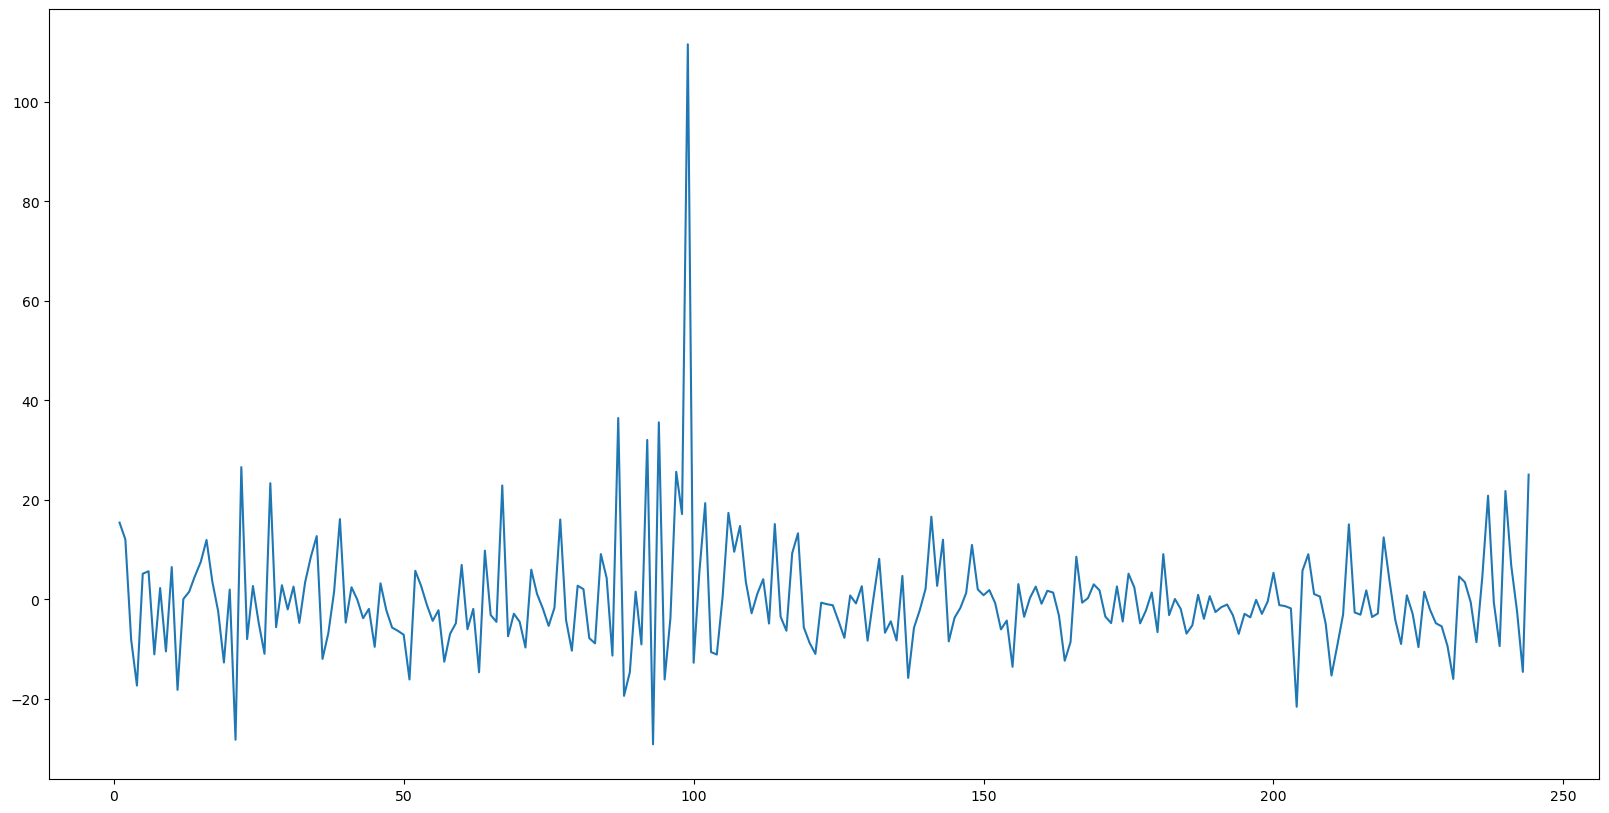

In [53]:
plt.plot(residus)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
Le graphique confirme la présomption d'autocorrélation des résidus, indiquant que les erreurs ne sont pas indépendantes dans le temps. Cela suggère une dépendance entre les valeurs successives des erreurs, ce qui peut compromettre la validité des résultats du modèle.


In [55]:
resultat_robust = resultats.get_robustcov_results(cov_type='HAC', maxlags=10)
print(resultat_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                  rford   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     50.31
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.44e-11
Time:                        02:03:25   Log-Likelihood:                -952.42
No. Observations:                 244   AIC:                             1909.
Df Residuals:                     242   BIC:                             1916.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0959      0.712     -0.135      0.8

In [60]:
stat4 = acorr_breusch_godfrey(resultat_robust, nlags=10)

# Pour le test de breusch godfrey d'autocorrelation 
# H0 : représente ce qu'on veut avoir donc
# H0 : non autocorrélation vs HA : Autocorrélation 

# Si p-value ≤ 0.05 rejet de H0 DONC Autocorrélation
# Si p-value > 0.05 non rejet de H0 DONC non Autocorrélation

print(stat4[1])

0.0003221422090251437


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Même après correction pour l'autocorrélation, des signes persistant d'autocorrélation des résidus demeurent. Cela peut indiquer des problèmes sous-jacents, tels que la spécification incorrecte du modèle ou l'omission de variables pertinentes. Ces facteurs peuvent entraîner une dépendance entre les erreurs, compromettant ainsi la robustesse et la fiabilité des résultats du modèle.